---
The notebook is available on [my](https://github.com/ccooper1982/uni-comp11127/tree/main/Lab%202) GitHub:

https://github.com/ccooper1982/uni-comp11127/tree/main/Lab%202
---

# Activity A

## 2D Array



In [1]:
import numpy as np

# create 2-D array of 3x6 with max value of 25
nCols = 6

np.random.seed(105)
arr_2d = np.random.randint(25, size=(3, nCols))
print(f"Original:\n{arr_2d}")

# copy the original array before we update values
arr_2d_copy = np.copy(arr_2d)

# 1. first row, 6th column
arr_2d_copy[0,5] = 15
print(f"1:\n{arr_2d_copy}")


# 2. replace 2nd row with a new random array (1 row, 6 cols)
arr_2d_copy[1] = np.random.randint(5, size=(1, nCols))
print(f"2:\n{arr_2d_copy}")


# 3. update middle two values of the 3rd using slicing notation.
arr_2d_copy[2][2:4] = 1
print(f"3:\n{arr_2d_copy}")

Original:
[[ 0 21 22  9  4  0]
 [ 0  4 16  4 13  1]
 [ 6 15  9 15 19 20]]
1:
[[ 0 21 22  9  4 15]
 [ 0  4 16  4 13  1]
 [ 6 15  9 15 19 20]]
2:
[[ 0 21 22  9  4 15]
 [ 4  1  4  2  2  4]
 [ 6 15  9 15 19 20]]
3:
[[ 0 21 22  9  4 15]
 [ 4  1  4  2  2  4]
 [ 6 15  1  1 19 20]]


The numpy developers consider comparing two arrays that have more than one element ambigious:

- Are they equal if any elements are the same
- Are they equal *only if* all elements the same value

So the `logical_and()` is used to perform an logical AND on each element:

```
arr1[n] && arr2[n]
```

then call `all()` to confirm all elements are `True`.




In [2]:
# 4. as (3) but re-instate original values by copying from the original array
arr_2d_copy[2][2:4] = arr_2d[2][2:4]
print(f"{arr_2d_copy}")
assert np.logical_and(arr_2d_copy[2], arr_2d[2]).all(), "Step 4"

[[ 0 21 22  9  4 15]
 [ 4  1  4  2  2  4]
 [ 6 15  9 15 19 20]]


## 3D Array

Seed the random generator, create a 3x5x5 array and copy the array.

In [8]:
np.random.seed(9)

arr_3d = np.random.randint(25, size=(3,5,5))
print(f"Original\n{arr_3d}")

arr_3d_copy = np.copy(arr_3d)

Original
[[[21 22 24 22  1]
  [22 20  8 17 24]
  [21  1  0 14 24]
  [10 24 10 24 12]
  [18 22 24  1 24]]

 [[ 3 11  5 19  6]
  [23  9 16 24 17]
  [ 8 13  1 13 12]
  [22 22 18  8  4]
  [21  3 20  0 10]]

 [[24 16  4 15  5]
  [20 24 19  8  4]
  [ 8  0  1  2 13]
  [12 19 13  7 23]
  [18 15 16 20 14]]]


Manually set values to `66` from top-left to bottom-right

In [9]:
arr_3d_copy[0][0][0] = 66
arr_3d_copy[0][1][1] = 66
arr_3d_copy[0][2][2] = 66
arr_3d_copy[0][3][3] = 66
arr_3d_copy[0][4][4] = 66
print(f"1.\n{arr_3d_copy}")

1.
[[[66 22 24 22  1]
  [22 66  8 17 24]
  [21  1 66 14 24]
  [10 24 10 66 12]
  [18 22 24  1 66]]

 [[ 3 11  5 19  6]
  [23  9 16 24 17]
  [ 8 13  1 13 12]
  [22 22 18  8  4]
  [21  3 20  0 10]]

 [[24 16  4 15  5]
  [20 24 19  8  4]
  [ 8  0  1  2 13]
  [12 19 13  7 23]
  [18 15 16 20 14]]]


Avoid hard coded indices by getting rows and columns from `shape`. This time set the `66` from bottom-left to top-right using a loop.

The loop uses `reversed()`, which could be replaced with:

```
range (nRows-1, -1, -1)
```

but I find `reversed()` more readable.

In [10]:
nRows = arr_3d_copy.shape[1]
nCols = arr_3d_copy.shape[2]

i = 0
for row in reversed(range(0, nRows)):
  arr_3d_copy[0][row][i] = 66
  i += 1

print(f"2.\n{arr_3d_copy}")

2.
[[[66 22 24 22 66]
  [22 66  8 66 24]
  [21  1 66 14 24]
  [10 66 10 66 12]
  [66 22 24  1 66]]

 [[ 3 11  5 19  6]
  [23  9 16 24 17]
  [ 8 13  1 13 12]
  [22 22 18  8  4]
  [21  3 20  0 10]]

 [[24 16  4 15  5]
  [20 24 19  8  4]
  [ 8  0  1  2 13]
  [12 19 13  7 23]
  [18 15 16 20 14]]]


This time use slicing.

In [11]:
i = 0
for row in range(0, nRows):
  arr_3d_copy[1][row, i:i+1] = 66
  i += 1

print(f"3.\n{arr_3d_copy}")

3.
[[[66 22 24 22 66]
  [22 66  8 66 24]
  [21  1 66 14 24]
  [10 66 10 66 12]
  [66 22 24  1 66]]

 [[66 11  5 19  6]
  [23 66 16 24 17]
  [ 8 13 66 13 12]
  [22 22 18 66  4]
  [21  3 20  0 66]]

 [[24 16  4 15  5]
  [20 24 19  8  4]
  [ 8  0  1  2 13]
  [12 19 13  7 23]
  [18 15 16 20 14]]]


This time do top-left to bottom-right and bottom-left to top-right in same loop.

In [12]:
i = 0
for row in range(0, nRows):
  arr_3d_copy[2][row, i:i+1] = 66
  arr_3d_copy[2][nRows-row-1, i:i+1] = 66
  i += 1

print(f"4.\n{arr_3d_copy}")

4.
[[[66 22 24 22 66]
  [22 66  8 66 24]
  [21  1 66 14 24]
  [10 66 10 66 12]
  [66 22 24  1 66]]

 [[66 11  5 19  6]
  [23 66 16 24 17]
  [ 8 13 66 13 12]
  [22 22 18 66  4]
  [21  3 20  0 66]]

 [[66 16  4 15 66]
  [20 66 19 66  4]
  [ 8  0 66  2 13]
  [12 66 13 66 23]
  [66 15 16 20 66]]]


# Activity B
The [dataset](https://archive.ics.uci.edu/dataset/94/spambase) is "Spambase" which classifies emails as spam/not spam based on 57 features.

It is available on the UCI Machine Learning Repository:

https://archive.ics.uci.edu/dataset/94/spambase

## Get Data Set


---
> I originally used `google.colab.files` package to show an upload prompt, then called Panda's `read_csv()`. But I discovered the `ucimlrepo` package to fetch the dataset directly.
---

On Google CoLab the package can be installed with:

In [13]:
%pip install ucimlrepo

## Use The Dataset

---
> There are 4601 rows and 57 features (columns) in this dataset. To avoid ugly  output when printing 10% rows with 57 columns, I have limited the rows to 10,  rather than 10%, and columns to 6.
---

Documentation for the UCI ML package is found [here](https://github.com/uci-ml-repo/ucimlrepo) but the basics are:

- Use `fetch_ucirepo()` to download the dataset
- This returns a `dotdict` which is similar to a `dict` but it provides access to keys as attributes

The important attributes are in the top level `data`:

- `original` : Dataframe consisting of all IDs, features and targets (including the NumPy array)
- `headers` : List of all variable names/headers

## Task A

In [14]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# dataset: a dotdict with original, features, targets, originals amongst others
# each of those is a Panda dataframe.
# details: https://github.com/uci-ml-repo/ucimlrepo
dataset = fetch_ucirepo(id=94)

## Task B

In [15]:
# data frame
dataframe = dataset.data.original

# for 10% rows: nMaxRows = len(dataframe.values) // 10
nMaxRows = 10
nMaxCols = 6

Print `word_freq_our` column.

In [16]:
print(dataframe['word_freq_our'])

0       0.32
1       0.14
2       1.23
3       0.63
4       0.63
        ... 
4596    0.00
4597    0.00
4598    0.00
4599    0.32
4600    0.00
Name: word_freq_our, Length: 4601, dtype: float64


Print the first `nMaxRows` of the `word_freq_you` column where `word_freq_you >= 3`.

In [17]:
columnIndex = dataframe.columns.get_loc('word_freq_you')
resultSeries = dataframe.word_freq_you >= 3
print(dataframe[resultSeries].values[0:nMaxRows, columnIndex:columnIndex+1])

[[3.47]
 [3.18]
 [3.18]
 [3.85]
 [3.84]
 [3.21]
 [3.15]
 [3.33]
 [3.52]
 [3.51]]


Sort by `word_freq_you` max value and print the first `nMaxRows` rows.

In [18]:
dataframe_sorted = dataframe.sort_values(by='word_freq_you', ascending=False)
array_sorted = dataframe_sorted["word_freq_you"].values

print(array_sorted[0:nMaxRows])

[18.75 14.28 14.28 14.   12.5  12.5  12.19 11.11 10.63  9.72]


## Task C


In [19]:
# without this call, scientific notation is used
np.set_printoptions(formatter={'float': '{: 0.3f}'.format},
                    suppress=True)

print(f"Showing {nMaxRows} rows")
print(dataframe.values[0:nMaxRows, 0:nMaxCols])

Showing 10 rows
[[ 0.000  0.640  0.640  0.000  0.320  0.000]
 [ 0.210  0.280  0.500  0.000  0.140  0.280]
 [ 0.060  0.000  0.710  0.000  1.230  0.190]
 [ 0.000  0.000  0.000  0.000  0.630  0.000]
 [ 0.000  0.000  0.000  0.000  0.630  0.000]
 [ 0.000  0.000  0.000  0.000  1.850  0.000]
 [ 0.000  0.000  0.000  0.000  1.920  0.000]
 [ 0.000  0.000  0.000  0.000  1.880  0.000]
 [ 0.150  0.000  0.460  0.000  0.610  0.000]
 [ 0.060  0.120  0.770  0.000  0.190  0.320]]


I also discovered the Pandas `option_context()` to set `max_rows` and `max_columns`. But rather printing the first `n` rows, it prints the first few rows and the last few rows. And similar for the columns.

In [20]:
with pd.option_context('display.max_rows', nMaxRows, 'display.max_columns', nMaxCols):
    print(dataset.data.original)

      word_freq_make  word_freq_address  word_freq_all  ...  \
0               0.00               0.64           0.64  ...   
1               0.21               0.28           0.50  ...   
2               0.06               0.00           0.71  ...   
3               0.00               0.00           0.00  ...   
4               0.00               0.00           0.00  ...   
...              ...                ...            ...  ...   
4596            0.31               0.00           0.62  ...   
4597            0.00               0.00           0.00  ...   
4598            0.30               0.00           0.30  ...   
4599            0.96               0.00           0.00  ...   
4600            0.00               0.00           0.65  ...   

      capital_run_length_longest  capital_run_length_total  Class  
0                             61                       278      1  
1                            101                      1028      1  
2                            485       

# Activity C

> I've reduced this to a few columns because there are so many.



## Task A

In [21]:
columnNames = ['capital_run_length_average',
               'capital_run_length_total',
               'capital_run_length_longest']


for col in columnNames:
  repeated = dataframe[col].value_counts().nlargest(5).index.tolist()
  print((f'{col}'
         f'\n\tMean: {dataframe[col].mean()}'
         f'\n\tStd. Deviation: {dataframe[col].std()}'
         f'\n\tFive Most Repeated: {repeated}'))


capital_run_length_average
	Mean: 5.191515105411866
	Std. Deviation: 31.729448740210845
	Five Most Repeated: [1.0, 2.0, 1.8, 1.5, 1.666]
capital_run_length_total
	Mean: 283.28928493805694
	Std. Deviation: 606.3478507248471
	Five Most Repeated: [5, 9, 7, 6, 4]
capital_run_length_longest
	Mean: 52.17278852423386
	Std. Deviation: 194.89130952646204
	Five Most Repeated: [1, 5, 11, 4, 12]


## Task B

Select the columns which represent the frequency of words, i.e. `word_freq_you` is how often "you" appears. The word frequency columns are from position 0 to 10th from the end.

In [22]:
wordColumns = dataframe.columns[0:-10].tolist();
print(wordColumns)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference']


To show the most common words, we can sum each `word_freq_*` columns:

In [23]:
wordFrequencySums = dataframe[wordColumns].apply(np.sum, axis=0)

The column names are now the index of the series returned by `apply()`. The names are cumbersome (`word_freq_you`, `word_freq_make`, etc) so snip off the `word_freq_` to leave just the word and update the index before plotting:

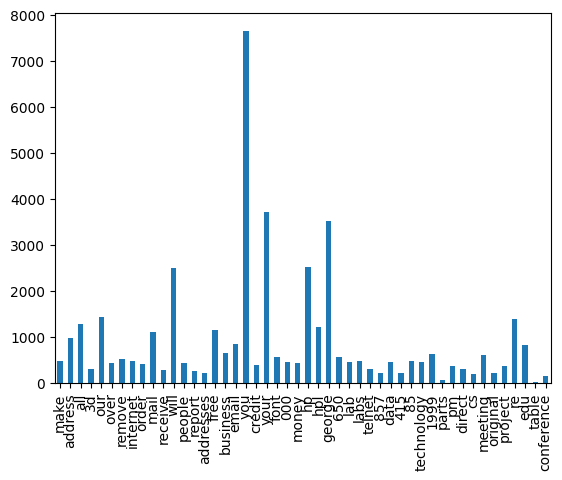

In [28]:
indexes = []
for name in wordFrequencySums.index:
  indexes.append(name[name.rfind('_')+1:])

wordFrequencySums.index = indexes
plotWords = wordFrequencySums.plot.bar()

Plot the average length of capital letters in the first 20 emails. The x-axis is each email:

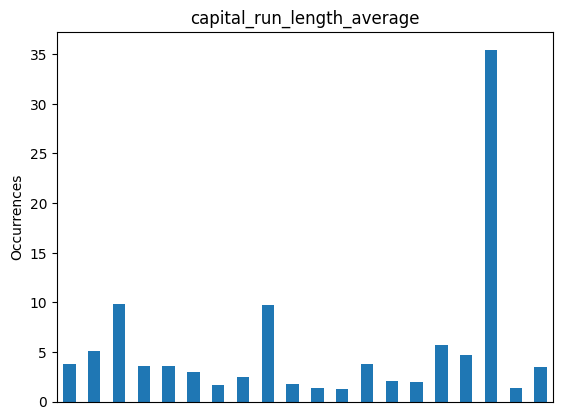

In [27]:
columnName = 'capital_run_length_average'
plot = dataframe[columnName][0:20].plot.bar(rot=0, title=columnName)
plot.set_ylabel('Occurrences')
plot.get_xaxis().set_visible(False)

## Task C
- This dataset is not ideal for this lab, with so many features and rows
- The data is from a study some years ago, within a company (hence the `word_freq_george` column), and seems to use a simplistic set of features for detecting spam emails
- Looking at the above bar chart, if we exclude "george", it seems "you", "your" and "will" are most commonly used. The next step would be to find a connection between these common words and the email classed as spam